<a href="https://colab.research.google.com/github/cameronliddle/CAForecast/blob/main/Copy_of_CAFifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
fifa_df =pd.read_excel("fifa.xlsx", index_col=0)
print(fifa_df.head())


                           name   rating  position   height    foot   rare  \
id                                                                           
1001             GÃ¡bor KirÃ¡ly       69        GK      191   Right      0   
100143             Frederik Boi       65         M      184   Right      0   
100264          Tomasz Szewczuk       57         A      185   Right      0   
100325   Steeve Joseph-Reinette       63         D      180    Left      0   
100326             Kamel Chafni       72         M      181   Right      0   

        pace  shooting  passing  dribbling  defending  heading  diving  \
id                                                                       
1001                                                                70   
100143    61        65       63         59         62       62           
100264    65        54       43         53         55       74           
100325    68        38       51         46         64       71           
100326   

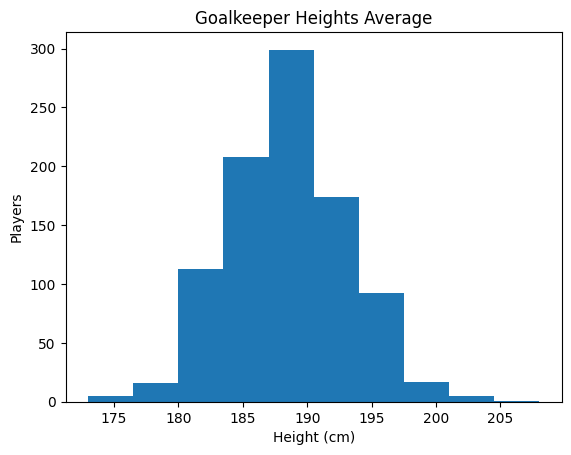

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df_gk = df[df[' position'] == ' GK']

plt.hist(df_gk[' height'], bins=10)

plt.title("Goalkeeper Heights Average")
plt.xlabel("Height (cm)")
plt.ylabel("Players")

plt.show()


In [6]:
goalkeepers = fifa_df[fifa_df[' position'] == ' GK']
average_height = goalkeepers[' height'].mean()
print("The average height of a goalkeeper is:", average_height)


The average height of a goalkeeper is: 188.23333333333332


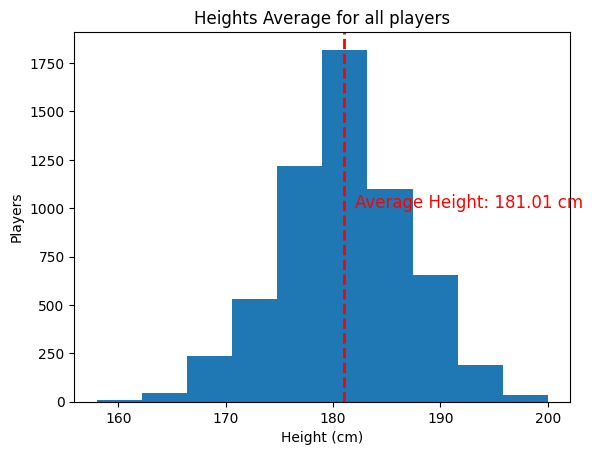

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df = df[df[' position'].isin([' M', ' S', ' D'])]

df[' height'] = pd.to_numeric(df[' height'], errors='coerce')

avg_height = df[' height'].mean()

plt.hist(df[' height'], bins=10)

plt.axvline(avg_height, color='red', linestyle='dashed', linewidth=2)
plt.text(avg_height + 1, 1000, f'Average Height: {round(avg_height, 2)} cm', fontsize=12, color='red')

plt.title("Heights Average for all players")
plt.xlabel("Height (cm)")
plt.ylabel("Players")

plt.show()


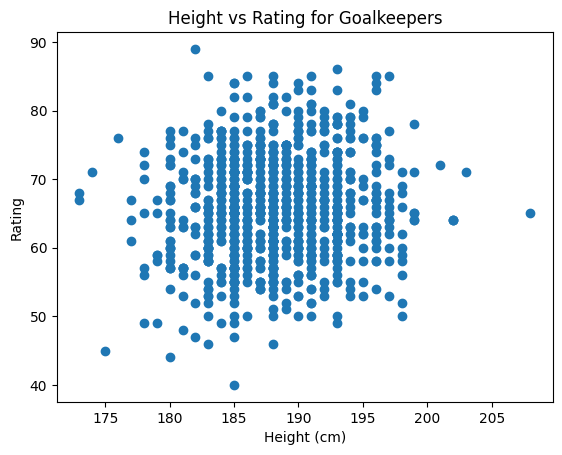

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df_gk = df[df[' position'] == ' GK']

plt.scatter(df_gk[' height'], df_gk[' rating'])
plt.title('Height vs Rating for Goalkeepers')
plt.xlabel('Height (cm)')
plt.ylabel('Rating')
plt.show()


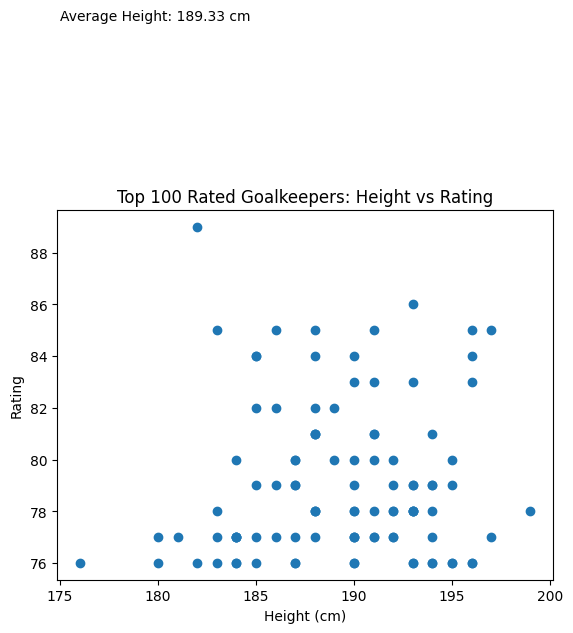

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df_gk = df[df[' position'] == ' GK']

df_top_gk = df_gk.sort_values(' rating', ascending=False).head(100)

avg_height = df_top_gk[' height'].mean()

plt.scatter(df_top_gk[' height'], df_top_gk[' rating'])

plt.title("Top 100 Rated Goalkeepers: Height vs Rating")
plt.xlabel("Height (cm)")
plt.ylabel("Rating")
plt.text(175, 97, f"Average Height: {round(avg_height, 2)} cm")

# Display the plot
plt.show()



In [10]:
attributes = fifa_df[fifa_df[' position']== ' D']
attributes
average_value_A = attributes.mean()
avg_value_round_A = round (average_value_A, 1)
avg_value_round_A

<ipython-input-10-a3657da761c9>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_value_A = attributes.mean()


 rating          66.1
 height         183.1
 rare             0.3
 pace            63.9
 shooting        43.6
 passing         55.5
 dribbling       51.8
 defending       68.1
 heading         66.8
 positioning      NaN
dtype: float64

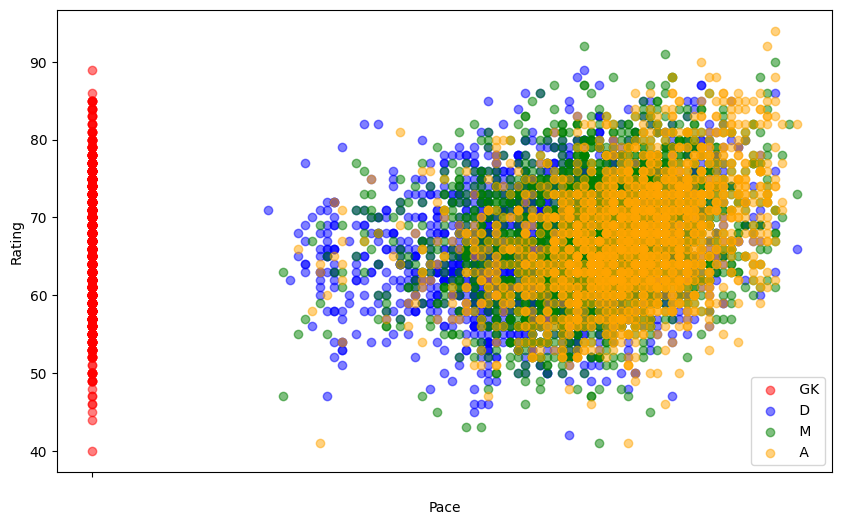

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

pace_rating_position_df = df[[' pace', ' rating', ' position']]

position_colors = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' pace'], data[' rating'], c=color, label=position, alpha=0.5)

ax.set_xlabel('Pace')
ax.set_ylabel('Rating')
ax.legend()

# Show the plot
plt.show()


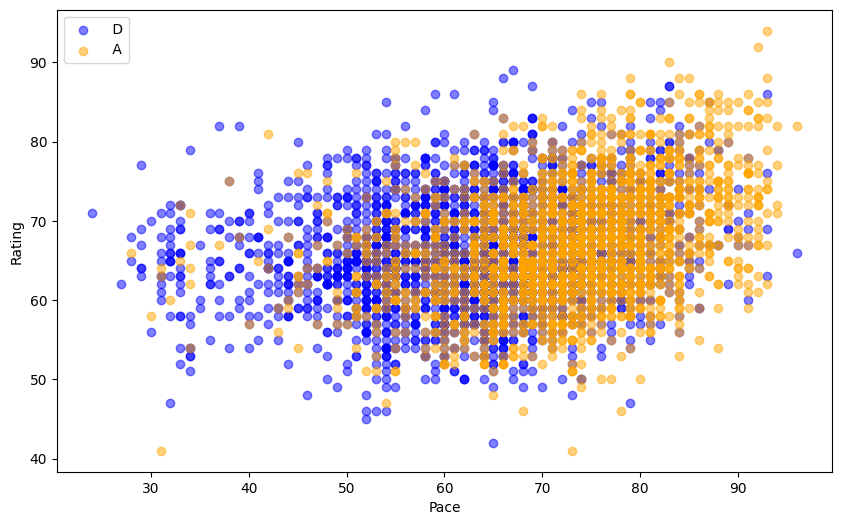

Top 10 Highest-Rated Defenders and Their Pace Ratings:

                   name   rating  pace
1199     Nemanja VidiÄ‡       89    67
1782             PiquÃ©       88    66
513        Philipp Lahm       87    83
2724       Thiago Silva       87    83
8765      Rio Ferdinand       87    69
590               Puyol       86    59
799          John Terry       86    61
1375         Dani Alves       86    93
176              LÃºcio       85    76
194    Alessandro Nesta       85    54

Top 10 Highest-Rated Attackers and Their Pace Ratings:

                      name   rating  pace
2195          Lionel Messi       94    93
7943     Cristiano Ronaldo       92    92
8697          Wayne Rooney       90    83
349            David Villa       88    85
1267         Carlos TÃ©vez       88    84
8138   Zlatan IbrahimoviÄ‡       88    79
8836          Samuel Eto'o       88    93
482      Antonio Di Natale       86    86
1637           Mario Gomez       86    79
1846        Sergio AgÃ¼ero       86   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

defender_attackers_df = df.loc[df[' position'].isin([' D', ' A'])]

pace_rating_position_df = defender_attackers_df[[' pace', ' rating', ' position']]

position_colors = {' D': 'blue', ' A': 'orange'}

fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' pace'], data[' rating'], c=color, label=position, alpha=0.5)

ax.set_xlabel('Pace')
ax.set_ylabel('Rating')
ax.legend()

plt.show()

top_defenders = defender_attackers_df[defender_attackers_df[' position'] == ' D'].nlargest(10, ' rating')
top_attackers = defender_attackers_df[defender_attackers_df[' position'] == ' A'].nlargest(10, ' rating')

print("Top 10 Highest-Rated Defenders and Their Pace Ratings:\n")
print(top_defenders[[' name', ' rating', ' pace']])
print("\nTop 10 Highest-Rated Attackers and Their Pace Ratings:\n")
print(top_attackers[[' name', ' rating', ' pace']])


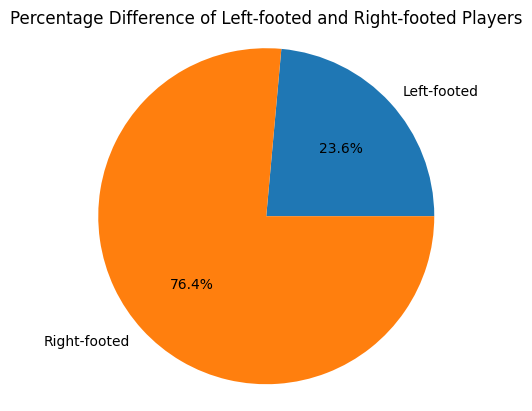

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('fifa.xlsx')

left_footed = df[df[' foot'] == ' Left'].count()[0]
right_footed = df[df[' foot'] == ' Right'].count()[0]

labels = ['Left-footed', 'Right-footed']
sizes = [left_footed, right_footed]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage Difference of Left-footed and Right-footed Players')
plt.show()


In [ ]:
import pandas as pd

df = pd.read_excel('fifa.xlsx')

foot_groups = df.groupby(' foot')

mean_ratings = foot_groups[' rating'].mean()

print(mean_ratings)

 foot
 Left     66.979376
 Right    66.588287
Name:  rating, dtype: float64


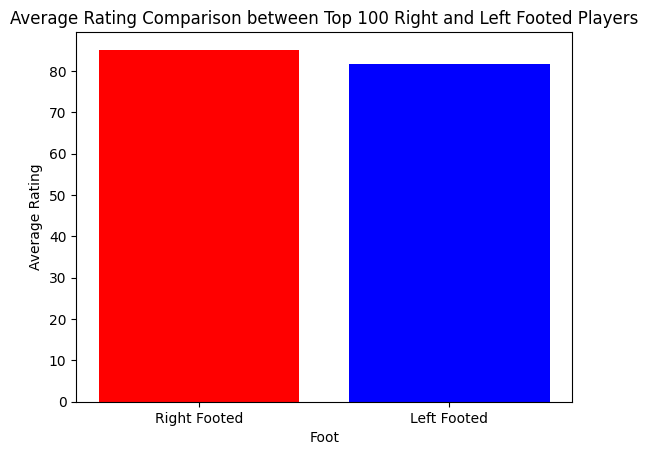

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('fifa.xlsx')

top_right_footed = data[data[' foot'] == ' Right'].nlargest(100, ' rating')
top_left_footed = data[data[' foot'] == ' Left'].nlargest(100, ' rating')

right_footed_avg_rating = top_right_footed[' rating'].mean()
left_footed_avg_rating = top_left_footed[' rating'].mean()

fig, ax = plt.subplots()
ax.bar(['Right Footed', 'Left Footed'], [right_footed_avg_rating, left_footed_avg_rating], color=['red', 'blue'])
plt.title('Average Rating Comparison between Top 100 Right and Left Footed Players')
plt.xlabel('Foot')
plt.ylabel('Average Rating')
plt.show()



Attackers common traits

In [11]:
import pandas as pd

# Load the FIFA dataset
df = pd.read_excel("fifa.xlsx")

# Filter for attackers
df_att = df[df[' position'] == ' A']

# Sort by rating and select top 5
df_top_att = df_att.sort_values(by=[' rating'], ascending=False).head(5)

# Print the top 5 attackers
print(df_top_att)

# Determine what they have in common
common_traits = set(df_top_att.columns.values)
for idx, row in df_top_att.iterrows():
    common_traits = common_traits.intersection(set(row.index.values))
print("Common traits:", common_traits)


          id                name   rating  position   height    foot   rare  \
2195  158023        Lionel Messi       94         A      169    Left      1   
7943   20801   Cristiano Ronaldo       92         A      186   Right      1   
8697   54050        Wayne Rooney       90         A      177   Right      1   
1267  143001       Carlos TÃ©vez       88         A      172   Right      1   
8836    9676        Samuel Eto'o       88         A      180   Right      1   

      pace  shooting  passing  dribbling  defending  heading  diving  \
2195    93        87       82         97         46       67           
7943    92        90       79         93         59       89           
8697    83        88       79         84         71       81           
1267    84        87       75         83         69       74           
8836    93        83       68         85         58       79           

      handling  kicking  reflexes  speed   positioning  
2195                               

In [ ]:
import pandas as pd

df = pd.read_excel("fifa.xlsx")

df_att = df[df[' position'].isin([' A'])]

top_att = df_att.nlargest(5, ' rating')

mean_stats = top_att.iloc[:, 4:].mean()

print("Mean of all stats for top 5 attackers:")
print(mean_stats)


Mean of all stats for top 5 attackers:
 height         175.8
 rare             1.0
 pace            87.4
 shooting        88.2
 passing         77.6
 dribbling       88.6
 defending       60.4
 heading         76.8
 positioning      NaN
dtype: float64


<ipython-input-47-21226cc840b8>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_stats = top_att.iloc[:, 4:].mean()


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("fifa.xlsx")

corr = np.corrcoef(df[' height'], df[' rating'])

print("Correlation coefficient between height and rating:", corr[0, 1])


Correlation coefficient between height and rating: -0.006108577058543702


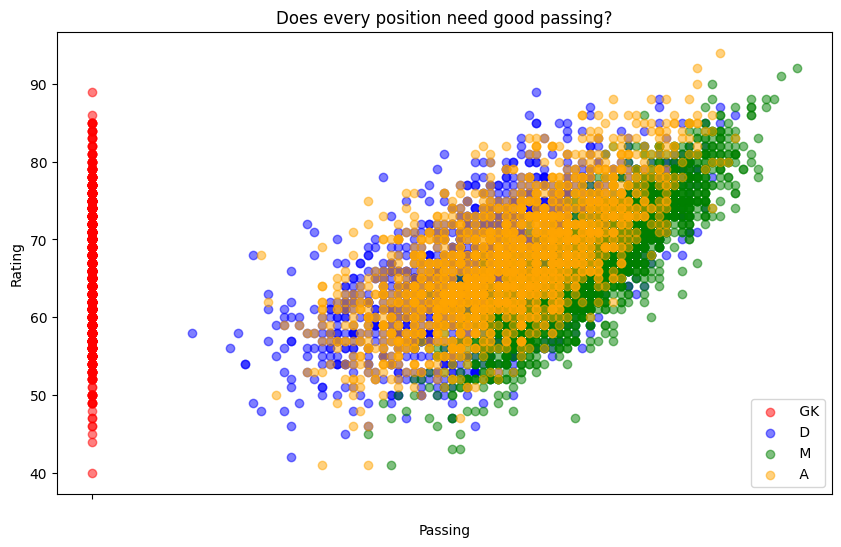

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

pace_rating_position_df = df[[' passing', ' rating', ' position']]

position_colors = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' passing'], data[' rating'], c=color, label=position, alpha=0.5)

ax.set_xlabel('Passing')
ax.set_ylabel('Rating')
ax.legend()

plt.title('Does every position need good passing?')
plt.show()

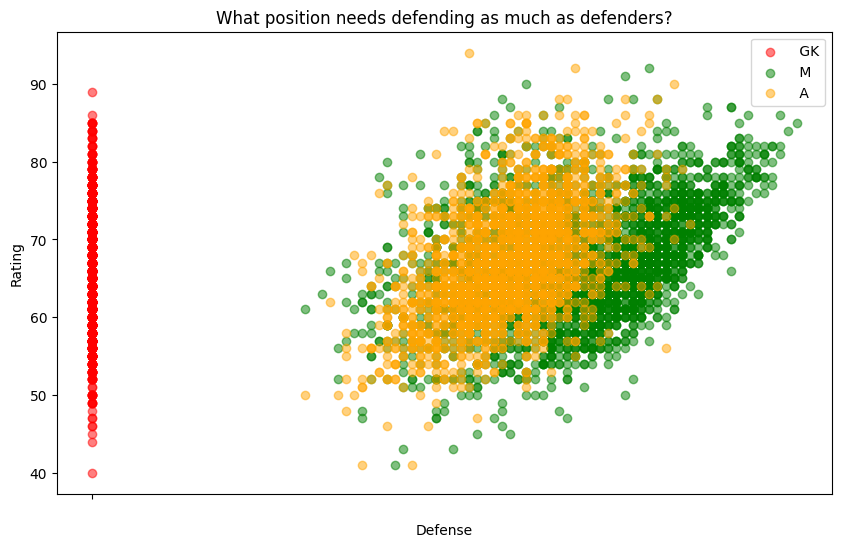

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

pace_rating_position_df = df[[' defending', ' rating', ' position']]

position_colors = {' GK': 'red', ' M': 'green', ' A': 'orange'}

fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' defending'], data[' rating'], c=color, label=position, alpha=0.5)

ax.set_xlabel('Defense')
ax.set_ylabel('Rating')
ax.legend()

plt.title('What position needs defending as much as defenders?')
plt.show()